## Classification

#### Classification binaire 

Un  problèmes de classification, qui consistent par exemple à classer un email en tant que
'spam' ou 'non spam'.
Dans cet exemple notre variable target 𝒚 pouvant prendre 2 valeurs seulement, par exemple 0 ou 1
- si 𝑦 = 0, alors l’email n’est pas un spam
- si 𝑦 = 1, alors l’email est un spam
On dit également que l’on a 2 **classes**, c’est une classification binaire.

## Exercice 

Avec make_classification on génére des données aléatoire

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import seaborn as sns

In [2]:
# Génération de données aléatoires: 100 exemples, 2 classes, 2 features x0 et x1
np.random.seed(1)
X, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=1,
 n_clusters_per_class=1) 

(100, 2)

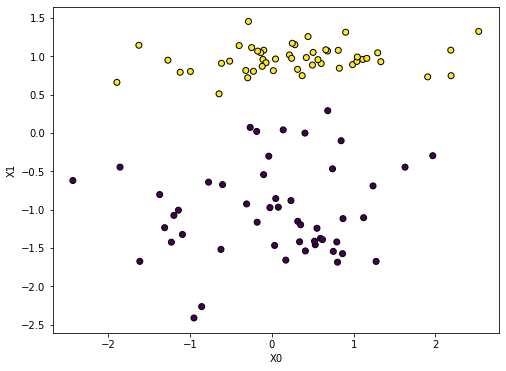

In [3]:
# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
X.shape 

**Vous allez créez un model qui permet de classifier ce dataset à l'aide d'une régression logistique**

In [4]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [5]:
clf.predict(X[:2, :])

array([0, 0])

In [6]:
clf.predict_proba(X[:2, :])

array([[0.99108165, 0.00891835],
       [0.63784898, 0.36215102]])

In [7]:
clf.score(X, y)

0.99

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)


In [11]:
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [12]:
clf.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [13]:
clf.predict_proba(X_test)

array([[0.03096345, 0.96903655],
       [0.04087668, 0.95912332],
       [0.63784898, 0.36215102],
       [0.90693627, 0.09306373],
       [0.01903139, 0.98096861],
       [0.01952379, 0.98047621],
       [0.1352217 , 0.8647783 ],
       [0.06471661, 0.93528339],
       [0.99642511, 0.00357489],
       [0.98980862, 0.01019138],
       [0.04123968, 0.95876032],
       [0.99847538, 0.00152462],
       [0.4129864 , 0.5870136 ],
       [0.09827171, 0.90172829],
       [0.07929678, 0.92070322],
       [0.97478795, 0.02521205],
       [0.0227525 , 0.9772475 ],
       [0.98292353, 0.01707647],
       [0.8946272 , 0.1053728 ],
       [0.05882171, 0.94117829]])

In [14]:
clf.score(X_test, y_test)

0.95

Jérémy

coef -0.03910267930513938 intercept -0.6418181808510894


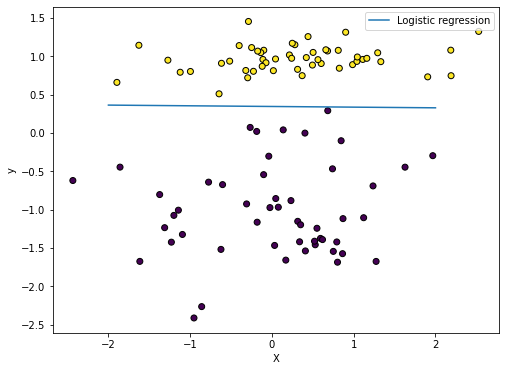

In [16]:
LogReg = LogisticRegression()
LogReg.fit(X,y)

m = LogReg.coef_[0,0]
b = LogReg.intercept_[0]
print("coef",m,"intercept",b)

LogReg_curve = lambda x: 1/(1 + math.e**(-(m*x+b)))         
x_values = np.linspace(-2, 2, 100)
y_values = LogReg_curve(x_values)

# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, edgecolors='k')
plt.plot(x_values,y_values,label='Logistic regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

coef -0.03910267930513938 intercept -0.6418181808510894


TypeError: float() argument must be a string or a number, not 'function'

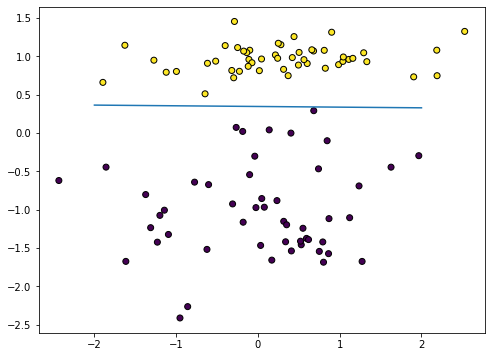

In [21]:
LogReg = LogisticRegression()
LogReg.fit(X,y)

m = LogReg.coef_[0,0]
b = LogReg.intercept_[0]
print("coef",m,"intercept",b)

LogReg_curve = lambda x: 1/(1 + math.e**(-(m*x+b)))         
x_values = np.linspace(-2, 2, 100)
y_values = LogReg_curve(x_values)

# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, edgecolors='k')
plt.plot(x_values,y_values,label='Logistic regression')

cs = plt.contourf(LogReg_curve, colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Vincent

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

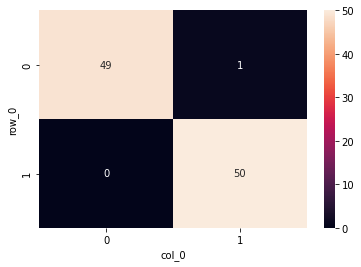

In [19]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X,y)
y_pred=logistic_regression.predict(X)

confusion_matrix = pd.crosstab(y, y_pred)
sns.heatmap(confusion_matrix, annot=True)

In [20]:
# permet de faire lambda x: 1/(1 + math.e*(-(mx+b))) si je comprend bien
from sklearn.metrics import roc_curve 

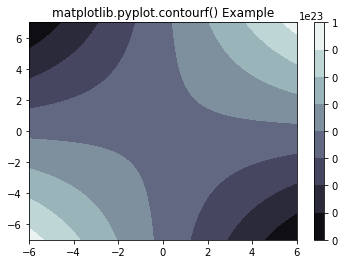

In [22]:
# Implementation of matplotlib function
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
from matplotlib import ticker, cm
   
N = 1000
x = np.linspace(-6.0, 6.0, N)
y = np.linspace(-7.0, 7.0, N)
X, Y = np.meshgrid(x, y)
   
Z1 = np.exp(X * Y)
z = 50 * Z1
z[:5, :5] = -1
z = ma.masked_where(z <= 0, z)
   
cs = plt.contourf(X, Y, z,
                  locator = ticker.LogLocator(),
                  cmap ="bone")
  
cbar = plt.colorbar(cs)
  
plt.title('matplotlib.pyplot.contourf() Example')
plt.show()